<a href="https://colab.research.google.com/github/iqiirascal-lgtm/DAA/blob/main/DAA_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#STUDI KASUS 1

#Adjacency Matrix
import numpy as np

#Define the adjacency factor
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 0],
                             [1, 0, 1, 0]])

#Set the damping factor
damping_factor = 0.85

#Initialize the PageRank values
num_pages = len(adjacency_matrix)
page_rank = np.ones(num_pages) / num_pages

#Number of iterations
num_iterations = 100

In [ ]:
# Number of iterations
num_iterations = 100

for i in range(num_iterations):
    new_page_rank = np.zeros(num_pages)
    for j in range(num_pages):
        # Calculate the PageRank contributions from each linking page
        linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
        for linking_pages in linking_pages:
            new_page_rank[j] += page_rank[linking_pages] / sum(adjacency_matrix[linking_pages, :])
        new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
    page_rank = new_page_rank

# Print the final PageRank values
for page, rank in enumerate(page_rank):
    print(f"Page {page + 1}: {rank}")

Page 1: 0.053437500000000006
Page 2: 0.4624999999999999
Page 3: 0.4465625
Page 4: 0.037500000000000006


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 0],
                             [1, 0, 1, 0]])

G = nx.DiGraph()

num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

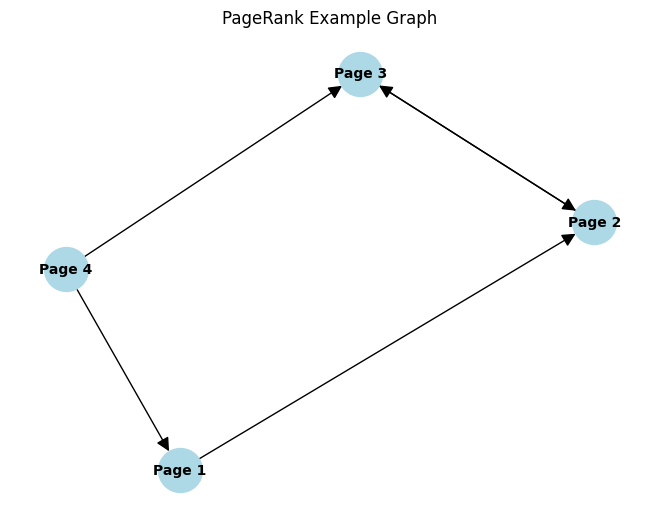

In [ ]:
num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

for i in range(num_pages):
  for j in range(num_pages):
    if adjacency_matrix[i, j] == 1:
      G.add_edge(i, j)


pos = nx.spring_layout(G)
labels = {i: f"Page {i + 1}" for i in range(num_pages)}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
plt.title("PageRank Example Graph")
plt.show()

In [ ]:
#STUDI KASUS 2

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
myWeb = nx.DiGraph()
myPages = range(1,5)

In [ ]:
connection = [(1,3),(2,1),(2,3),(3,1),(3,2),(3,4),(4,5),(5,1),(5,4)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connection)

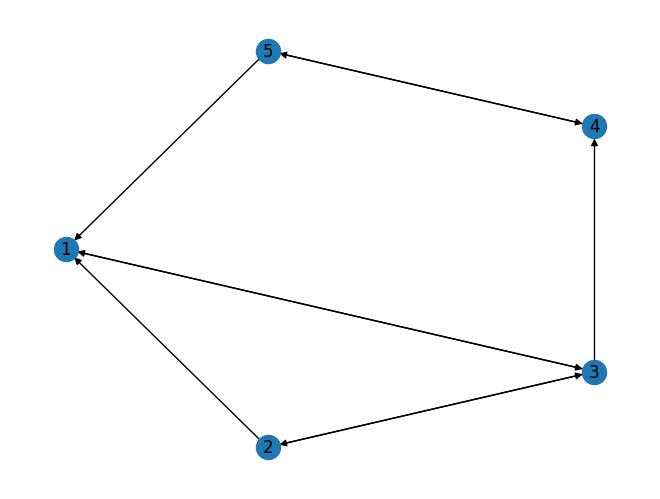

In [ ]:
pos=nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True)
plt.show()

In [2]:
import networkx as nx
import numpy as np

def CreatePageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_array(aGraph)
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(1.0 / outwards)
    G = np.multiply(M, prob_outwards[:, np.newaxis])

    p = np.ones(nodes_set) / float(nodes_set)
    return G, p


# Contoh Penggunaan
myWeb = nx.DiGraph()
connections = [(1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 4), (4, 5), (5, 1), (5, 4)]
myWeb.add_edges_from(connections)

G, p = CreatePageRank(myWeb)
print(G)

[[0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5        0.        ]]


In [3]:
G, p = CreatePageRank(myWeb)
print(G)

[[0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5        0.        ]]


In [21]:
# STUDI KASUS 3

import numpy as np

# Matriks adjacency (contoh dari studi kasus)
adjacency_matrix = np.array([
    [0, 1, 1, 0, 1],  # A → B, C, E
    [1, 0, 1, 1, 0],  # B → A, C, D
    [0, 0, 0, 1, 0],  # C → D
    [0, 1, 0, 0, 1],  # D → B, E
    [1, 0, 1, 0, 0]   # E → A, C
])

# Parameter PageRank
damping_factor = 0.85
num_iterations = 100
pagerank = np.ones(adjacency_matrix.shape[0]) / adjacency_matrix.shape[0]

# Iterasi utama
for _ in range(num_iterations):
    # Inisialisasi PageRank baru
    new_pagerank = np.zeros(pagerank.shape, dtype=float)

    # Hitung berdasarkan rumus PageRank
    for i in range(adjacency_matrix.shape[0]):
        num_outlinks = np.sum(adjacency_matrix[i, :])  # jumlah tautan keluar dari halaman i
        if num_outlinks > 0:
            for j in range(adjacency_matrix.shape[1]):
                if adjacency_matrix[i, j] == 1:
                    new_pagerank[j] += (damping_factor * pagerank[i] / num_outlinks)

    # Normalisasi PageRank (teleportasi)
    new_pagerank += (1 - damping_factor) / len(pagerank)

    # Perbarui nilai PageRank
    pagerank = new_pagerank

# Hasil PageRank
print("Hasil PageRank:")
print(pagerank)


Hasil PageRank:
[0.16167854 0.18589912 0.20748746 0.25903576 0.18589912]


In [22]:
import numpy as np

num_pages = 5

outlinks = np.array([3, 2, 1, 2, 2])

inlinks = np.array([1, 2, 1, 2, 1])

pagerank = np.ones(num_pages, dtype=float) / num_pages

damping_factor = 0.85

num_iterations = 100

In [23]:
for _ in range(num_iterations):
    # Inisialisasi PageRank baru
    new_pagerank = np.zeros(num_pages, dtype=float)

    for i in range(num_pages):        # untuk setiap halaman tujuan i
        for j in range(num_pages):    # untuk setiap halaman asal j
            if i != j and outlinks[j] > 0 and adjacency_matrix[j][i] == 1:
                new_pagerank[i] += damping_factor * (pagerank[j] / outlinks[j])

    # Terapkan faktor damping dan tambahkan nilai konstan
    pagerank = (1 - damping_factor) / num_pages + new_pagerank

# Tampilkan hasil akhir PageRank
print("Hasil PageRank:")
for i, pr in enumerate(pagerank):
    print(f"Halaman {chr(ord('A') + i)}: {pr:.4f}")


Hasil PageRank:
Halaman A: 0.3302
Halaman B: 0.3531
Halaman C: 0.4237
Halaman D: 0.5402
Halaman E: 0.3531


In [28]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def pagerank_iterative(adj_matrix, d=0.85, iters=100):
    n = adj_matrix.shape[0]
    pr = np.ones(n) / n
    outlinks = adj_matrix.sum(axis=1)

    for _ in range(iters):
        new_pr = np.zeros(n)
        for i in range(n):
            for j in range(n):
                if adj_matrix[j, i] == 1 and outlinks[j] > 0:
                    new_pr[i] += d * (pr[j] / outlinks[j])
        new_pr += (1 - d) / n
        pr = new_pr
    return pr

def draw_graph(edges, pos=None, title="Graph"):
    G = nx.DiGraph()
    G.add_edges_from(edges)
    plt.figure(figsize=(6, 4))
    nx.draw(G, pos or nx.spring_layout(G, seed=7),
            with_labels=True, node_size=2000,
            node_color='skyblue', arrowsize=18,
            font_weight='bold')
    plt.title(title)
    plt.axis("off")
    plt.show()


=== Hasil PageRank – LATIHAN 1 ===
Halaman 1: 0.025000
Halaman 2: 0.046250
Halaman 3: 0.064313
Halaman 4: 0.079666
Halaman 5: 0.092716
Halaman 6: 0.103808


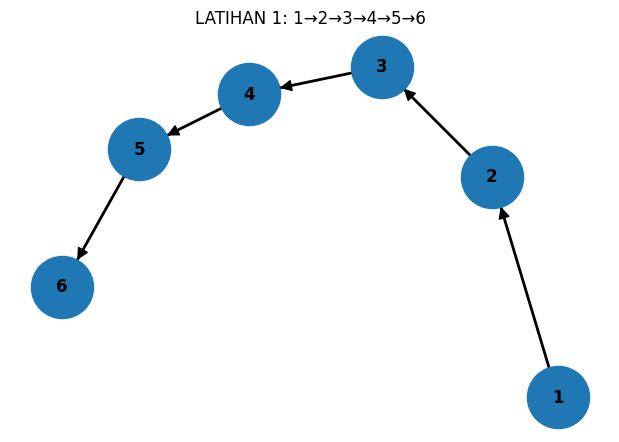

In [25]:
# === LATIHAN 1 ===
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# ===== 1. Definisikan koneksi antar node =====
# Graf: 1 → 2 → 3 → 4 → 5 → 6
edges_L1 = [(1,2), (2,3), (3,4), (4,5), (5,6)]

# Buat adjacency matrix (6x6)
n1 = 6
adj_L1 = np.zeros((n1, n1), dtype=int)
for u, v in edges_L1:
    adj_L1[u-1, v-1] = 1

# ===== 2. Fungsi menghitung PageRank =====
def pagerank_iterative(adj_matrix, d=0.85, iters=100):
    n = adj_matrix.shape[0]
    pr = np.ones(n) / n
    outlinks = adj_matrix.sum(axis=1)

    for _ in range(iters):
        new_pr = np.zeros(n)
        for i in range(n):
            for j in range(n):
                if adj_matrix[j, i] == 1 and outlinks[j] > 0:
                    new_pr[i] += d * (pr[j] / outlinks[j])
        new_pr += (1 - d) / n
        pr = new_pr
    return pr

# ===== 3. Hitung PageRank =====
pr_L1 = pagerank_iterative(adj_L1)
print("=== Hasil PageRank – LATIHAN 1 ===")
for i, val in enumerate(pr_L1, start=1):
    print(f"Halaman {i}: {val:.6f}")

# ===== 4. Visualisasi Graph =====
G1 = nx.DiGraph()
G1.add_edges_from(edges_L1)
pos_L1 = {1:(4.8,0.2), 2:(4.2,1.0), 3:(3.2,1.4), 4:(2.0,1.3), 5:(1.0,1.1), 6:(0.3,0.6)}

plt.figure(figsize=(6,4))
nx.draw(G1, pos_L1, with_labels=True, node_size=2000, arrowsize=18, font_weight='bold')
nx.draw_networkx_edges(G1, pos_L1, width=2, arrows=True)
plt.title("LATIHAN 1: 1→2→3→4→5→6")
plt.axis("off")
plt.show()


=== Hasil PageRank – LATIHAN 2 ===
Halaman 1: 0.200000
Halaman 2: 0.200000
Halaman 3: 0.200000
Halaman 4: 0.200000
Halaman 5: 0.200000


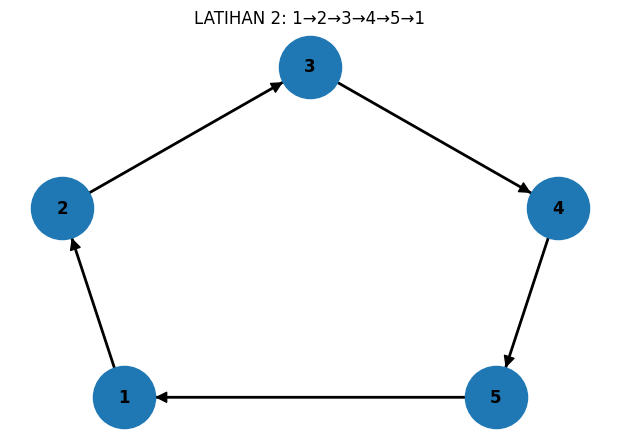

In [24]:
# === LATIHAN 2 ===
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# ===== 1. Definisikan koneksi antar node =====
# Graf: 1 → 2 → 3 → 4 → 5 → 1 (siklus)
edges_L2 = [(1,2), (2,3), (3,4), (4,5), (5,1)]

# Buat adjacency matrix (5x5)
n2 = 5
adj_L2 = np.zeros((n2, n2), dtype=int)
for u, v in edges_L2:
    adj_L2[u-1, v-1] = 1

# ===== 2. Fungsi PageRank =====
def pagerank_iterative(adj_matrix, d=0.85, iters=100):
    n = adj_matrix.shape[0]
    pr = np.ones(n) / n
    outlinks = adj_matrix.sum(axis=1)

    for _ in range(iters):
        new_pr = np.zeros(n)
        for i in range(n):
            for j in range(n):
                if adj_matrix[j, i] == 1 and outlinks[j] > 0:
                    new_pr[i] += d * (pr[j] / outlinks[j])
        new_pr += (1 - d) / n
        pr = new_pr
    return pr

# ===== 3. Hitung PageRank =====
pr_L2 = pagerank_iterative(adj_L2)
print("=== Hasil PageRank – LATIHAN 2 ===")
for i, val in enumerate(pr_L2, start=1):
    print(f"Halaman {i}: {val:.6f}")

# ===== 4. Visualisasi Graph =====
G2 = nx.DiGraph()
G2.add_edges_from(edges_L2)
pos_L2 = {1:(0.2,0.2), 2:(0.1,0.6), 3:(0.5,0.9), 4:(0.9,0.6), 5:(0.8,0.2)}

plt.figure(figsize=(6,4))
nx.draw(G2, pos_L2, with_labels=True, node_size=2000, arrowsize=18, font_weight='bold')
nx.draw_networkx_edges(G2, pos_L2, width=2, arrows=True)
plt.title("LATIHAN 2: 1→2→3→4→5→1")
plt.axis("off")
plt.show()


=== Hasil PageRank – LATIHAN 3 ===
Halaman 1: 0.030000
Halaman 2: 0.042750
Halaman 3: 0.042750
Halaman 4: 0.102675
Halaman 5: 0.117274


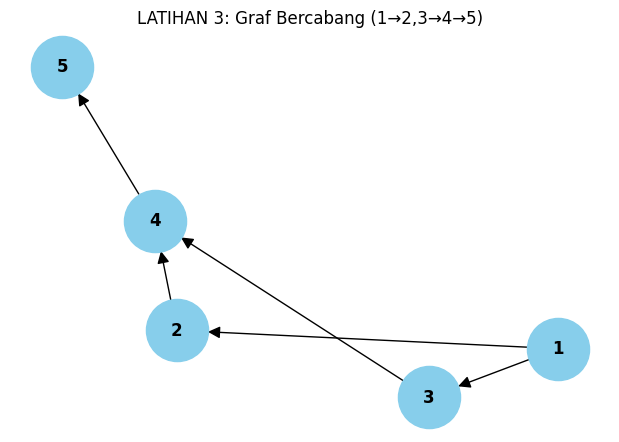

In [29]:
# LATIHAN 3
# 1 → 2, 1 → 3, 2 → 4, 3 → 4, 4 → 5
edges_L3 = [(1,2), (1,3), (2,4), (3,4), (4,5)]

n3 = 5
adj_L3 = np.zeros((n3, n3), dtype=int)
for u,v in edges_L3:
    adj_L3[u-1, v-1] = 1

pr_L3 = pagerank_iterative(adj_L3)
print("=== Hasil PageRank – LATIHAN 3 ===")
for i, val in enumerate(pr_L3, start=1):
    print(f"Halaman {i}: {val:.6f}")

draw_graph(edges_L3, title="LATIHAN 3: Graf Bercabang (1→2,3→4→5)")

=== Hasil PageRank – LATIHAN 4 ===
Halaman 1: 0.099272
Halaman 2: 0.162993
Halaman 3: 0.099272
Halaman 4: 0.114381
Halaman 5: 0.078612


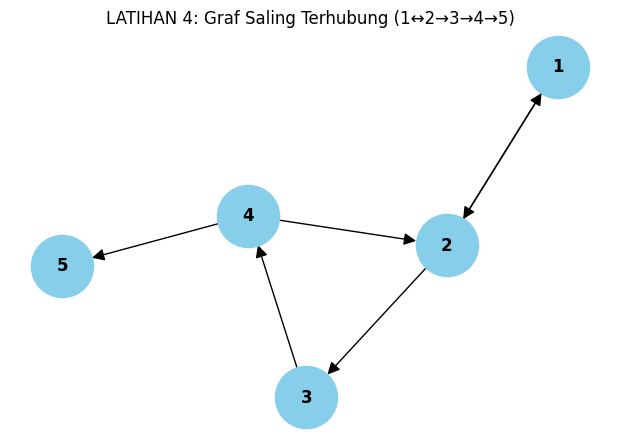

In [30]:
# LATIHAN 4
# 1 ↔ 2, 2 → 3, 3 → 4, 4 → 2, 4 → 5
edges_L4 = [(1,2), (2,1), (2,3), (3,4), (4,2), (4,5)]

n4 = 5
adj_L4 = np.zeros((n4, n4), dtype=int)
for u,v in edges_L4:
    adj_L4[u-1, v-1] = 1

pr_L4 = pagerank_iterative(adj_L4)
print("=== Hasil PageRank – LATIHAN 4 ===")
for i, val in enumerate(pr_L4, start=1):
    print(f"Halaman {i}: {val:.6f}")

draw_graph(edges_L4, title="LATIHAN 4: Graf Saling Terhubung (1↔2→3→4→5)")


=== Hasil PageRank – LATIHAN 5 ===
Halaman 1: 0.166958
Halaman 2: 0.171914
Halaman 3: 0.322255
Halaman 4: 0.166958
Halaman 5: 0.171914


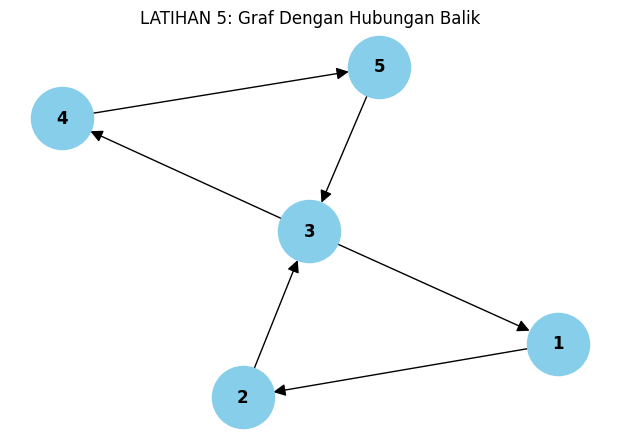

In [31]:
# LATIHAN 5
# 1 → 2, 2 → 3, 3 → 1, 3 → 4, 4 → 5, 5 → 3
edges_L5 = [(1,2), (2,3), (3,1), (3,4), (4,5), (5,3)]

n5 = 5
adj_L5 = np.zeros((n5, n5), dtype=int)
for u,v in edges_L5:
    adj_L5[u-1, v-1] = 1

pr_L5 = pagerank_iterative(adj_L5)
print("=== Hasil PageRank – LATIHAN 5 ===")
for i, val in enumerate(pr_L5, start=1):
    print(f"Halaman {i}: {val:.6f}")

draw_graph(edges_L5, title="LATIHAN 5: Graf Dengan Hubungan Balik")


=== Hasil PageRank – LATIHAN 6 ===
Halaman 1: 0.025000
Halaman 2: 0.035625
Halaman 3: 0.035625
Halaman 4: 0.055281
Halaman 5: 0.055281
Halaman 6: 0.118978


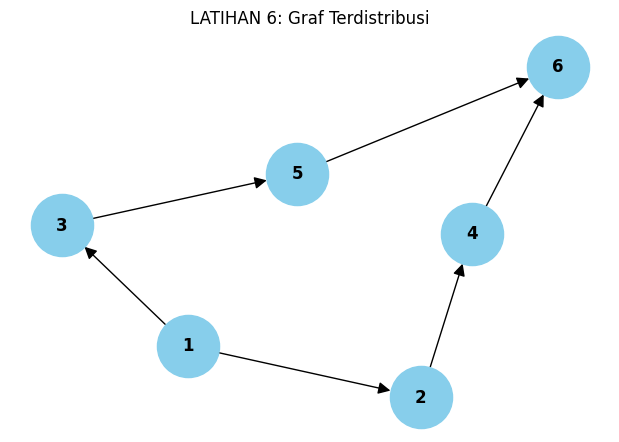

In [32]:
# LATIHAN 6
# 1 → 2, 1 → 3, 2 → 4, 3 → 5, 4 → 6, 5 → 6
edges_L6 = [(1,2), (1,3), (2,4), (3,5), (4,6), (5,6)]

n6 = 6
adj_L6 = np.zeros((n6, n6), dtype=int)
for u,v in edges_L6:
    adj_L6[u-1, v-1] = 1

pr_L6 = pagerank_iterative(adj_L6)
print("=== Hasil PageRank – LATIHAN 6 ===")
for i, val in enumerate(pr_L6, start=1):
    print(f"Halaman {i}: {val:.6f}")

draw_graph(edges_L6, title="LATIHAN 6: Graf Terdistribusi")


=== Hasil PageRank – LATIHAN 7 ===
Halaman 1: 0.166958
Halaman 2: 0.242872
Halaman 3: 0.100957
Halaman 4: 0.322255
Halaman 5: 0.166958


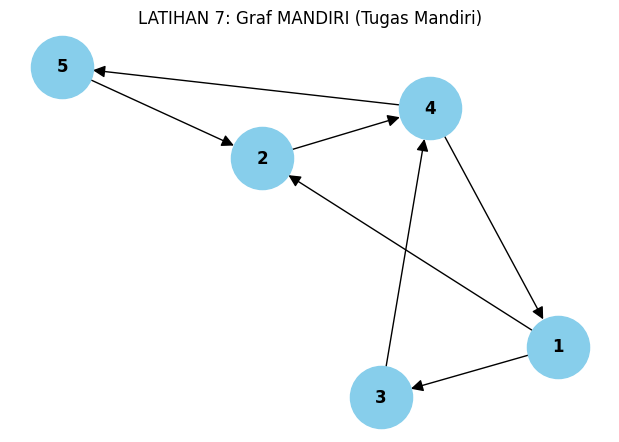

In [34]:
# LATIHAN 7 – Graf Mandiri
# 1 → 2, 1 → 3, 2 → 4, 3 → 4, 4 → 1, 4 → 5, 5 → 2
edges_L7 = [(1,2), (1,3), (2,4), (3,4), (4,1), (4,5), (5,2)]

n7 = 5
adj_L7 = np.zeros((n7, n7), dtype=int)
for u,v in edges_L7:
    adj_L7[u-1, v-1] = 1

pr_L7 = pagerank_iterative(adj_L7)
print("=== Hasil PageRank – LATIHAN 7 ===")
for i, val in enumerate(pr_L7, start=1):
    print(f"Halaman {i}: {val:.6f}")

draw_graph(edges_L7, title="LATIHAN 7: Graf MANDIRI (Tugas Mandiri)")
